# PS4_12232253_殷玉领

In [427]:
# Import modules
import glob
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
%matplotlib inline
import cmaps 
from scipy import stats
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

# 导入Cartopy专门提供的经纬度的Formatter
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

#隐藏警告
import warnings
warnings.filterwarnings('ignore')

In [428]:
Eqs = pd.read_csv(r'D:\APP4\Anaconda\YYL_HW\HW4\usgs_earthquakes.csv')
Eqs.longitude = Eqs.longitude+180
Eqs.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,27.2919,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,64.8691,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,30.7472,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,31.0425,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,64.3075,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


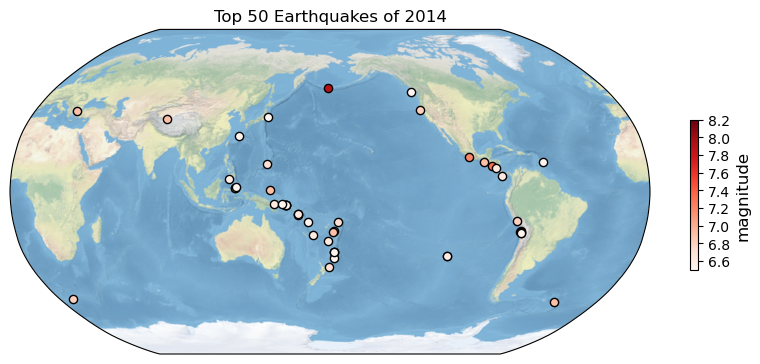

In [430]:
#取震级最大的前50个地震的数据
Eqs_6_5 = Eqs.sort_values(['mag'],ascending = False)[0:50]

#定义绘图函数
def main(Eqs_6_5):
    
    #创建画布
    fig = plt.figure(figsize=(8, 6),dpi=100)
    
    #在画布上添加axes，[0,0,0.8,0.9]依次为左底宽高，即划定axes在画布上的区域
    ax=fig.add_axes([0,0,0.8,0.9],projection=ccrs.Robinson(central_longitude=180))
    
    # make the map global rather than have it zoom in to
    # the extents of any plotted data
    ax.set_global()
    ax.stock_img()

    #在地图上绘制50个地震发生的位置，填充的颜色越深震级越大
    for i in range(len(Eqs_6_5)):
        color = Eqs_6_5.iloc[i].mag
        cmap = plt.cm.get_cmap('Reds')         #导入色条
        x_value = Eqs_6_5.iloc[i].longitude+180
        y_value = Eqs_6_5.iloc[i].latitude
        ax.scatter(x=x_value,y=y_value, 
                   transform=ccrs.PlateCarree(),
                   s=35,                      #scale，尺寸
                   c=color,ec='k',            #填充颜色和边缘颜色
                   linewidth=1,vmin=Eqs_6_5.mag.min(), 
                   vmax=Eqs_6_5.mag.max(),
                   cmap=cmap)

    #根据数据范围得到正则化规则
    norm=plt.Normalize(Eqs_6_5.mag.min(),Eqs_6_5.mag.max())
    
    #设置颜色条
    sm=plt.cm.ScalarMappable(norm=norm,cmap=cmap)
    plt.title('Top 50 Earthquakes of 2014')
    
    #颜色条放置的左、底、宽、高
    cbar_ax=fig.add_axes([0.85,0.32,0.01,0.25])
    
    #设置颜色条的位置，颜色，上下限，显示刻度，竖直放置。
    cbar=mpl.colorbar.ColorbarBase(cbar_ax,cmap='Reds',norm=mpl.colors.Normalize(6.5,8.2),ticks=list(np.linspace(6.6,8.2,9)),
                                   orientation='vertical')
    #添加颜色条标题
    cbar.ax.set_ylabel('magnitude',fontsize=12)
    plt.show()

#调用绘图函数
if __name__ == '__main__':
    main(Eqs_6_5)

In [ ]:
#2_0 数据说明及预处理

#0. 数据说明：
#1. 所分析的数据为：全球日最高温度数据集  （CPC .50x.50 全球每日温度）
#2. 只含陆地数据，南极洲数据缺失！！ 
#3. 1991-2020，格式为nc文件；
#4. 数据获取链接：https://psl.noaa.gov/data/gridded/data.cpc.globaltemp.html

#数据预处理：
#由全球日最高&最低温度数据集得到：全球日温差数据集

#找到所有文件的路径
nc_path = glob.glob(r"Tem_Data2\*.nc")
new_nc = []
new_nc_time = []

#读取数据，暂存
for i in range(len(nc_path)):
    tmax_all=xr.open_dataset(nc_path[i])['tmax']
    new_nc.append((tmax_all))
     
    
#用concat，按时间合并数据
da=xr.concat(new_nc,dim='time')

#输出合并后的nc文件
da.to_netcdf('Tem_Data2\\tmax_1979_2020.nc') 
#tem_diff = tmax['tmax']-tmin['tmin']
#tem_diff

In [431]:
#查看nc文件
temp = xr.open_dataset(r'CESM2_200001-201412.nc')
x = tmax_1979_2020.tmax

# Apply mean reduction from coordinates as performed in NCL's dim_rmvmean_n_Wrap(x,0)
# Apply this only to x.isel(time=0) because NCL plot plots only for time=0

tmax_new = x.isel(time=0)
tmax_new

<xarray.DataArray 'tmax' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     datetime64[ns] 2020-01-01
Attributes: (12/13)
    units:         degC
    var_desc:      Maximum Temperature
    level_desc:    Surface
    statistic:     Maximum
    parent_stat:   Other
    long_name:     Daily Maximum Temperature
    ...            ...
    valid_range:   [-90.  50.]
    avg_period:    0000-00-01 00:00:00
    dataset:       CPC Global Temperature
    comments:      GTS data and is gridded using the Shepard Algorithm
    max_period:    6z to 6z
    actual_range:  [-58.963314  53.05325 ]

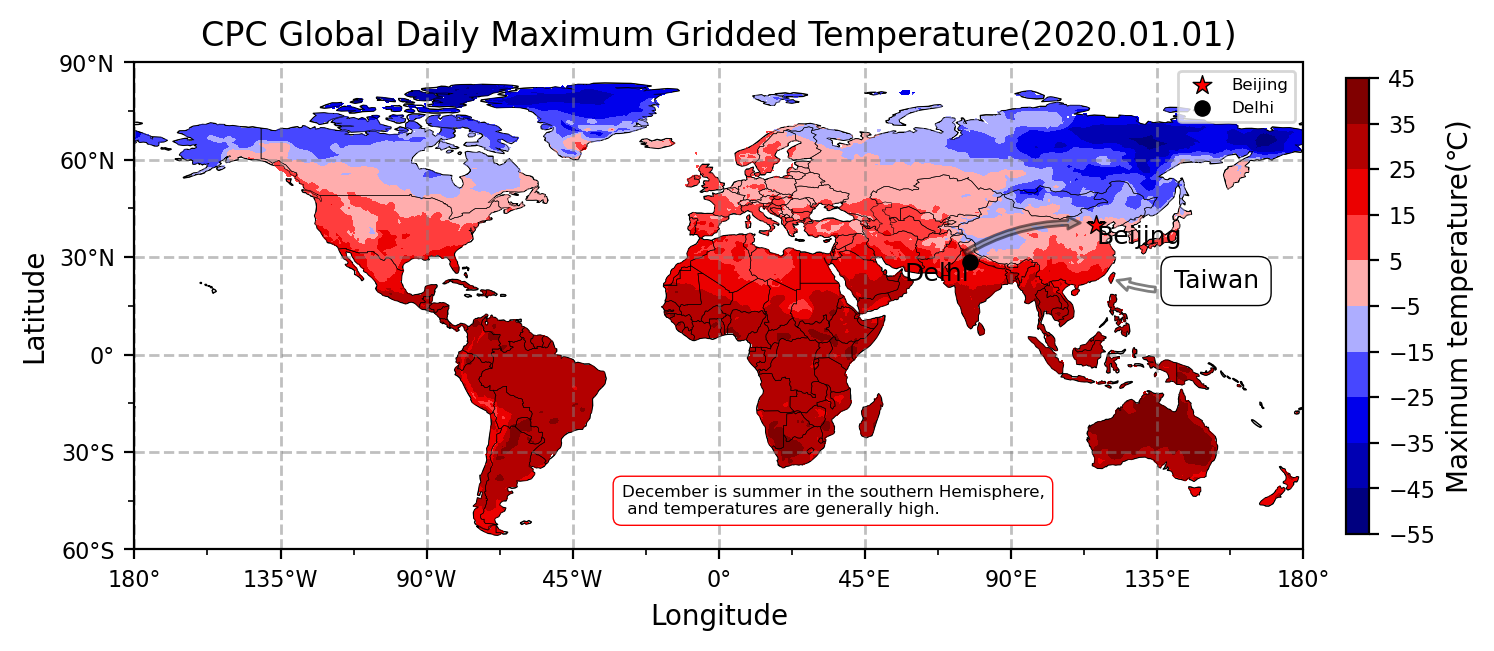

In [432]:
#2_1 全球尺度2020.01.01日最高温度等高线图

# 设置绘图区域.
lonmin, lonmax = -180, 180
latmin, latmax = -60, 90
extents = [lonmin, lonmax, latmin, latmax]

#北京、深圳、德里经纬度
Beijing_lon, Beijing_lat = 116, 40
Shenzhen_lon, Shenzhen_lat = 114, 22.5
Delhi_lon, Delhi_lat = 77.23, 28.61
    
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(8, 6),dpi=200)

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Use global map and draw coastlines
ax.set_global()
#ax.stock_img()  #带颜色的世界地图,控制底图是否填充
ax.coastlines(linewidth=0.5, resolution="110m")

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.2,
                                           zorder=2))

# 导入cmap色条
newcmp = cmaps.BlRe
newcmp.colors[len(newcmp.colors) 
              //2] = [1, 1, 1]  # Set middle value to white to match NCL

# 绘制填充颜色的等高线图（等温线）
p = tmax_new.plot.contourf(
    ax=ax,
    vmin=-1,
    vmax=50,
    levels=list(np.linspace(-55,45,11)),
    cmap=newcmp,
    add_colorbar=False,
    transform=projection,
    add_labels=False)

# 添加色条
cbar = plt.colorbar(p,
                    #orientation='horizontal',
                    shrink=0.4,                              #缩放系数
                    extendrect=True,      
                    extendfrac='auto',
                    pad=0.03,                                #间距
                    aspect=20,                               #条宽
                    drawedges=False)
cbar.ax.tick_params(labelsize=8)                             #刻度字号
cbar.set_ticks(list(np.linspace(-55,45,11)))                 #自定义刻度及间距
cbar.ax.set_ylabel('Maximum temperature(℃)',fontsize=10)    #为色条添加标题

# 设置x大刻度和小刻度
ax.tick_params(labelsize=8)
tick_proj = ccrs.PlateCarree()
ax.set_xticks(np.arange(-180, 180 + 45, 45), crs=tick_proj)
ax.set_xticks(np.arange(-180, 180 + 22.5, 22.5), minor=True, crs=tick_proj)
ax.set_xlabel('Longitude',fontsize=10)

# 设置y大刻度和小刻度
ax.tick_params(labelsize=8)
ax.set_yticks(np.arange(-60, 90 + 30, 30), crs=tick_proj)
ax.set_yticks(np.arange(-60, 90 + 15, 15), minor=True, crs=tick_proj)
ax.set_ylabel('Latitude',fontsize=10)

# 利用Formatter格式化刻度标签  （可以解决0度经线值不连续的问题）
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 在最后调用set_extent,防止刻度拓宽显示范围.
if extents is None:
    ax.set_global()
else:
    ax.set_extent(extents, crs=proj)

# 设置标题
ax.set_title(r'CPC Global Daily Maximum Gridded Temperature(2020.01.01)',fontsize=12)

# 设置网格线
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  xlocs=np.arange(-180, 180 + 45, 45),
                  ylocs=np.arange(-60, 90 + 30, 30),
                  #draw_labels=True,
                  linewidth=1, 
                  color='gray', 
                  alpha=0.5, 
                  linestyle='--')

# 绘制北京的位置，显示legend
ax.scatter(Beijing_lon,Beijing_lat,
           s=50,
           c='red',
           marker='*',
           label='Beijing',
           ec='k', 
           lw=0.5,
           zorder=3)
ax.scatter(Delhi_lon,Delhi_lat,
           s=30,
           c='k',
           marker='o',
           label='Delhi',
           ec='k', 
           lw=0.5,
           zorder=3)
ax.legend(loc='upper right',fontsize=6)

# 设置注释
transform = ccrs.PlateCarree()._as_mpl_transform(ax) #坐标系转换
ax.annotate('Beijing', xy=(116.4, 39.9),
            fontsize=9,
            xycoords=transform,
            ha='left',
            va='top')
ax.annotate('Delhi', xy=(113, 40.5), xytext=(77.23, 28.61),fontsize=9,
            #设置箭头，德里到北京
            arrowprops=dict(facecolor='gray',
                            arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2",
                            alpha=0.5),
            xycoords=transform,
            ha='right', va='top')
ax.annotate('Taiwan',xy=(121,23.5),xytext=(140,20.5),fontsize=9,
            arrowprops=dict(dict(facecolor='white',
                            arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2",
                            alpha=0.5)),
            bbox=dict(boxstyle='round,pad=0.5', fc='White',lw=0.5))
# 设置文本框
ax.text(-30, -50, 'December is summer in the southern Hemisphere,\n and temperatures are generally high.',
        verticalalignment ='bottom',
        horizontalalignment ='left',
        transform = transform,
        color ='k', fontsize = 6,
        bbox=dict(boxstyle='round,pad=0.5', fc='White',lw=0.5,ec='r'))

# 显示图片
fig.tight_layout()
plt.show()

# Show the plot
plt.show()

#保存图片
fig.savefig('tmax.png', dpi=200, bbox_inches='tight')
plt.close(fig)

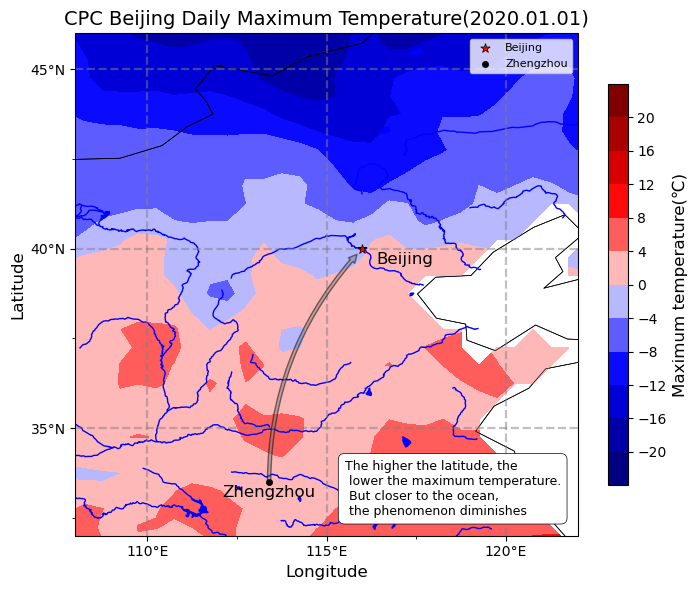

In [435]:
#2_2 北京附近2020.01.01日最高温度等高线图

#北京、郑州经纬度
Beijing_lon, Beijing_lat = 116, 40
Zhengzhou_lon, Zhengzhou_lat = 113.4, 33.5
    
# Generate figure (set its size (width, height) in inches)
fig = plt.figure(figsize=(8, 6),dpi=100)

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)

# Use global map and draw coastlines
ax.set_global()
#ax.stock_img()  #带颜色的世界地图,控制底图颜色
ax.coastlines(linewidth=0.5, resolution="110m")

# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5,
                                           zorder=2))

# 添加河流图层 
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
ax.add_feature(cfeature.LAKES, 
               edgecolor='blue', 
               facecolor='blue', 
               zorder=2)
ax.add_feature(rivers_10m,
               facecolor='None', 
               edgecolor='blue', 
               linewidth=1,
               zorder=2)

# 导入cmap色条
newcmp = cmaps.BlRe
newcmp.colors[len(newcmp.colors) 
              //2] = [1, 1, 1]  # Set middle value to white to match NCL

# 绘制填充颜色的等高线图（等温线）
p = tmax_new.plot.contourf(
    ax=ax,
    vmin=-20,
    vmax=20,
    levels=list(np.linspace(-20,20,11)),
    cmap=newcmp,
    add_colorbar=False,
    transform=projection,
    add_labels=False)

# 添加色条
cbar = plt.colorbar(p,
                    #orientation='horizontal',
                    shrink=0.8,                          #缩放系数
                    extendrect=True,      
                    extendfrac='auto',
                    pad=0.04,                            #间距
                    aspect=20,                           #条宽
                    drawedges=False)
cbar.ax.tick_params(labelsize=10)                        #刻度字号
cbar.set_ticks(list(np.linspace(-20,20,11)))             #自定义刻度及间距
cbar.ax.set_ylabel('Maximum temperature(℃)',fontsize=12)#为色条添加标题

# 设置x大刻度和小刻度
ax.tick_params(labelsize=10)
tick_proj = ccrs.PlateCarree()
ax.set_xticks(np.arange(-180, 180 + 5, 5), crs=tick_proj)
ax.set_xticks(np.arange(-180, 180 + 2.5, 2.5), minor=True, crs=tick_proj)
ax.set_xlabel('Longitude',fontsize=12)

# 设置y大刻度和小刻度
ax.tick_params(labelsize=10)
ax.set_yticks(np.arange(-60, 90 + 5, 5), crs=tick_proj)
ax.set_yticks(np.arange(-60, 90 + 2.5, 2.5), minor=True, crs=tick_proj)
ax.set_ylabel('Latitude',fontsize=12)

# 利用Formatter格式化刻度标签  （可以解决0度经线值不连续的问题）
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# 在最后调用set_extent,防止刻度拓宽显示范围.
#if extents is None:
#    ax.set_global()
#else:
#    ax.set_extent(extents, crs=proj)

# 设置标题
ax.set_title(r'CPC Beijing Daily Maximum Temperature(2020.01.01)',fontsize=14)

# 设置网格线
gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  xlocs=np.arange(-180, 180 + 5, 5),
                  ylocs=np.arange(-60, 90 + 5, 5),
                  #draw_labels=True,
                  linewidth=1.6, 
                  color='gray', 
                  alpha=0.5, 
                  linestyle='--')

# 绘制北京的位置，显示legend
ax.scatter(Beijing_lon,Beijing_lat,
           s=50,
           c='red',
           marker='*',
           label='Beijing',
           ec='k', 
           lw=0.5,
           zorder=3)
ax.scatter(Zhengzhou_lon,Zhengzhou_lat,
           s=20,
           c='k',
           marker='o',
           label='Zhengzhou',
           ec='k', 
           lw=0.5,
           zorder=3)
ax.legend(loc='upper right',fontsize=8)

# 设置绘图区域.
extents = [Beijing_lon-8, Beijing_lon+6, Beijing_lat-8, Beijing_lat+6]
ax.set_extent(extents, crs=proj)

# 设置注释
transform = ccrs.PlateCarree()._as_mpl_transform(ax) #坐标系转换

ax.annotate('Beijing', xy=(116.4, 39.9), fontsize=12,xycoords=transform,
            ha='left', va='top')

ax.annotate('Zhengzhou', xy=(115.9, 39.9), xytext=(113.4, 33.4),fontsize=12,
            #设置箭头，郑州到北京
            arrowprops=dict(facecolor='gray',
                            arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2",
                            alpha=0.5),
            xycoords=transform,
            ha='center', va='top')

# 设置文本框
ax.text(115.5, 32.5, 'The higher the latitude, the\n lower the maximum temperature.\n But closer to the ocean,\n the phenomenon diminishes',
        verticalalignment ='bottom',
        horizontalalignment ='left',
        transform = transform,
        color ='black', fontsize = 9,
        bbox=dict(boxstyle='round,pad=0.5', fc='White',lw=0.5,ec='k'))

# 显示图片
fig.tight_layout()
plt.show()

# Show the plot
plt.show()

#保存图片
fig.savefig('tmax_region.png', dpi=200, bbox_inches='tight')
plt.close(fig)